In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm import tqdm

## Problem 1 - Solitons

## 3)

In [282]:
delta_x = 0.05
x_lim = 10
delta_t = 10**(-4)*np.floor(4*np.sqrt(2)/3/np.sqrt(3)*delta_x**3 * 10**4)
x_grid = np.arange(-x_lim, x_lim, delta_x)
v = 20
x_0 = 0

In [280]:
def f(u):
    func = -6*u*(np.roll(u, -1) - np.roll(u, 1))/(2*delta_x) - (np.roll(u, -2) - np.roll(u, 2) - 2*np.roll(u, -1) + 2*np.roll(u, 1))/(2*delta_x**3)
    return func

In [281]:
def rk_update(u):
    alpha_1 = delta_t*f(u)
    alpha_2 = delta_t*f(u + alpha_1/2)
    alpha_3 = delta_t*f(u + alpha_2/2)
    alpha_4 = delta_t*f(u + alpha_3)
    return u + 1/6*(alpha_1 + 2*alpha_2 + 2*alpha_3 + alpha_4)

In [178]:
def u_1(x, t, v, x_0):
    return v/(2*(np.cosh(v**0.5*(x - v*t - x_0)/2))**2)

In [279]:
def u_2(x):
    return 10*np.exp(-x**2)

In [180]:
def u_3(x):
    return 6/np.cosh(x)**2

In [283]:
def run(u_init):
    u = []
    u_prev = u_init
    u.append(u_prev)
    for t in tqdm(np.arange(0, 10, delta_t)):
        u_new = rk_update(u_prev)
        u.append(u_new)
        u_prev = u_new
    return u

## a) Single soliton

In [182]:
u = run(u_init = u_1(x_grid, 0, v, x_0))

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:44<00:00, 2223.83it/s]


I know that animation was not required but it's fun, so here you go :)

<IPython.core.display.Javascript object>


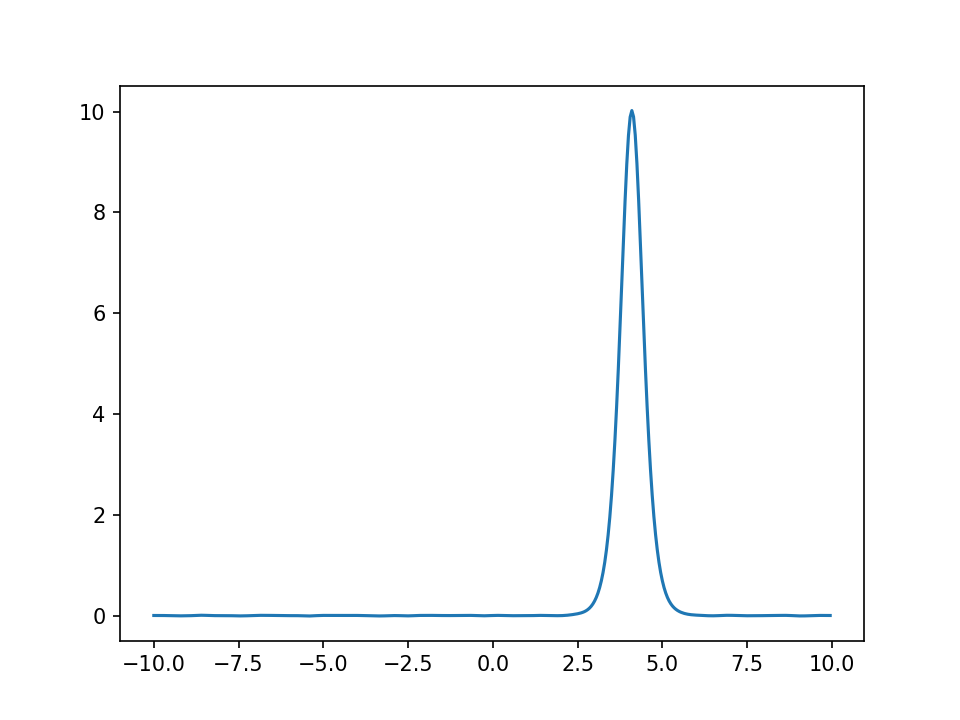

In [185]:
u_init = u_1(x_grid, 0, v, 0)
fig, ax = plt.subplots()

line, = ax.plot(x_grid, u_init)


def animate(i):
    line.set_ydata(u[10*i])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=50)
plt.show()

<IPython.core.display.Javascript object>


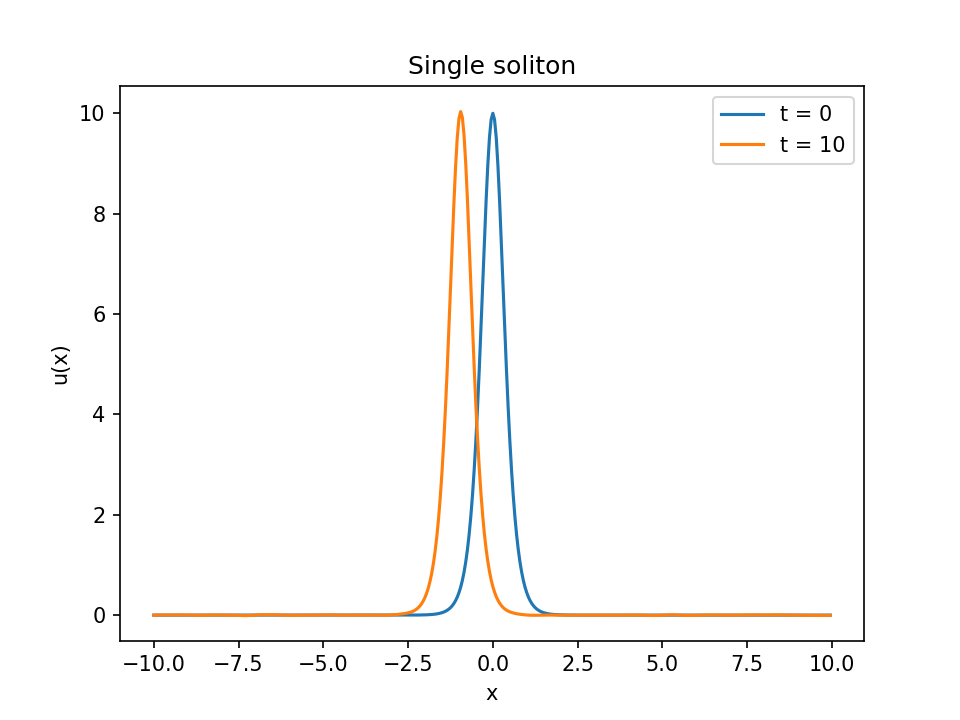

In [189]:
plt.figure()
plt.title('Single soliton')
plt.plot(x_grid, u_1(x_grid, 0, v, x_0), label = 't = 0')
plt.plot(x_grid, u[-1], label = 't = 10')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

Soliton travels at speed slightly less than $v$ accross the periodic domain and will return to its initial position unchanged.

## b) Single almost gaussian soliton

In [284]:
u = run(u_init = u_2(x_grid))

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:43<00:00, 2283.63it/s]


<IPython.core.display.Javascript object>


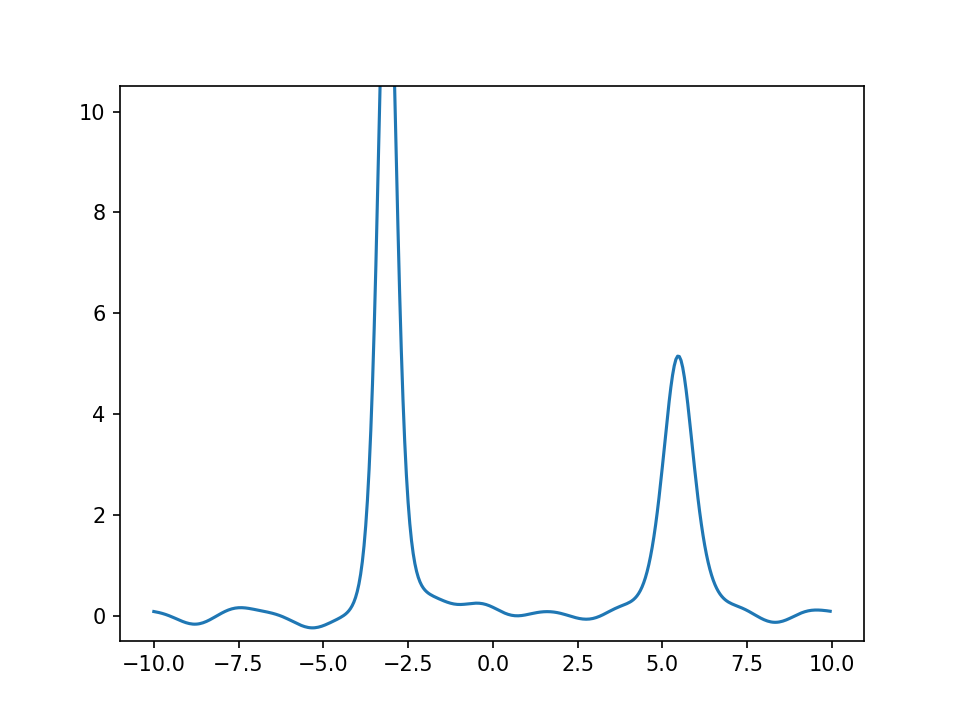

In [285]:
u_init = u_2(x_grid)
fig, ax = plt.subplots()

line, = ax.plot(x_grid, u_init)


def animate(i):
    line.set_ydata(u[10*i])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=50)
plt.show()

<IPython.core.display.Javascript object>


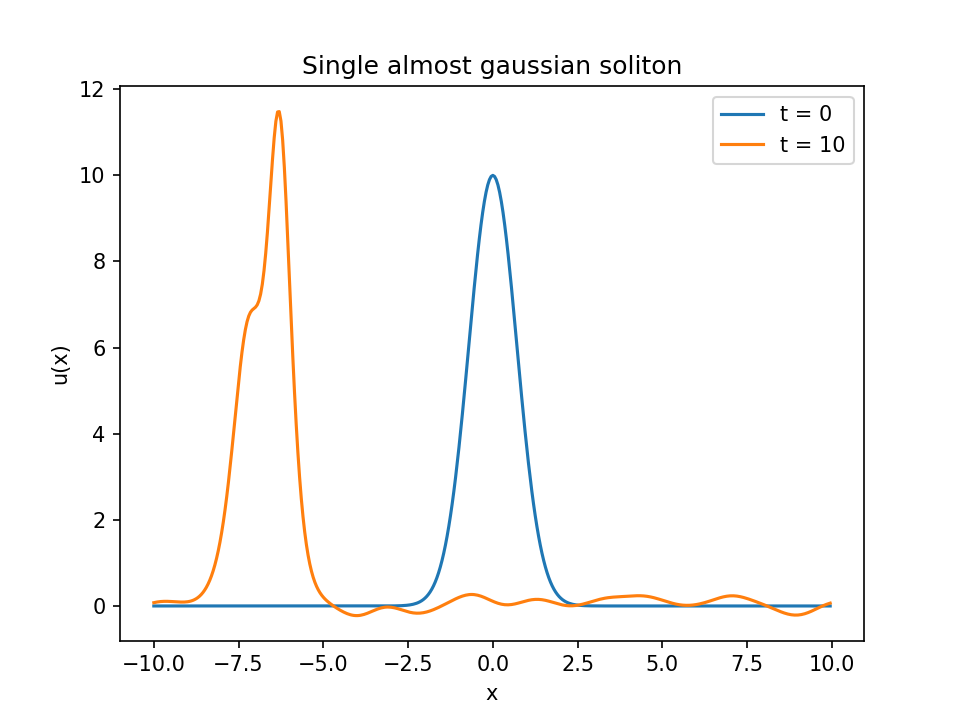

In [192]:
plt.figure()
plt.title('Single almost gaussian soliton')
plt.plot(x_grid, u_2(x_grid), label = 't = 0')
plt.plot(x_grid, u[-1], label = 't = 10')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

The almost gaussian soliton divides into two single solitons with different amplitude and speed. Also, one can observe small ripples throughout the domain.

## c) Two solitons

In [286]:
u = run(u_init = u_3(x_grid))

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:44<00:00, 2265.06it/s]


<IPython.core.display.Javascript object>


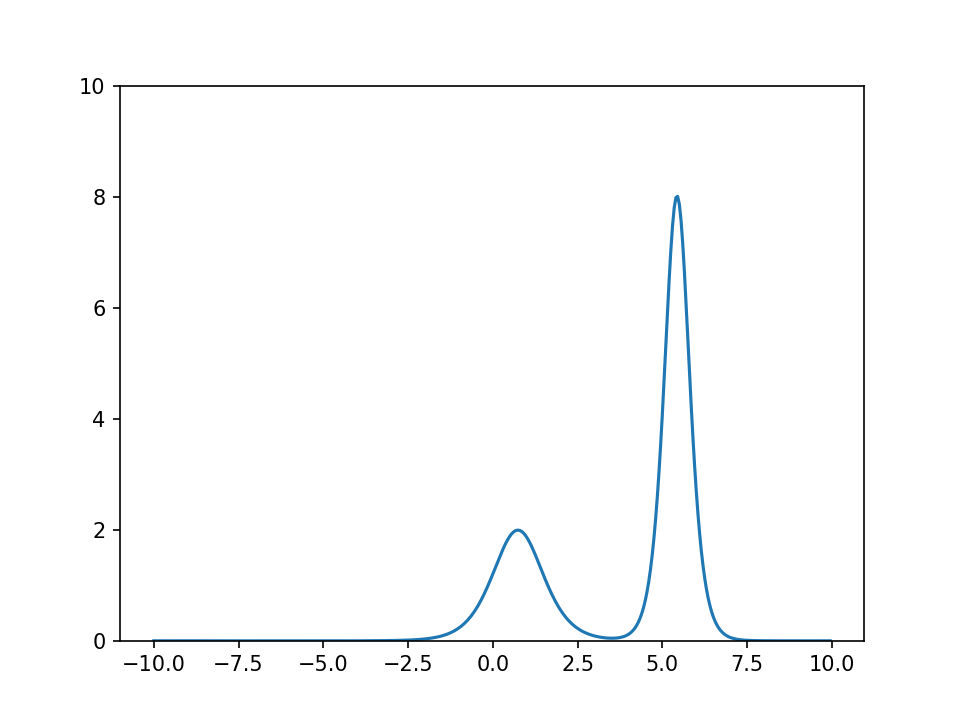

In [287]:
u_init = u_3(x_grid)
fig, ax = plt.subplots()

ax.set_ylim(0, 10)

line, = ax.plot(x_grid, u_init)


def animate(i):
    line.set_ydata(u[10*i])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=50)
plt.show()

<IPython.core.display.Javascript object>


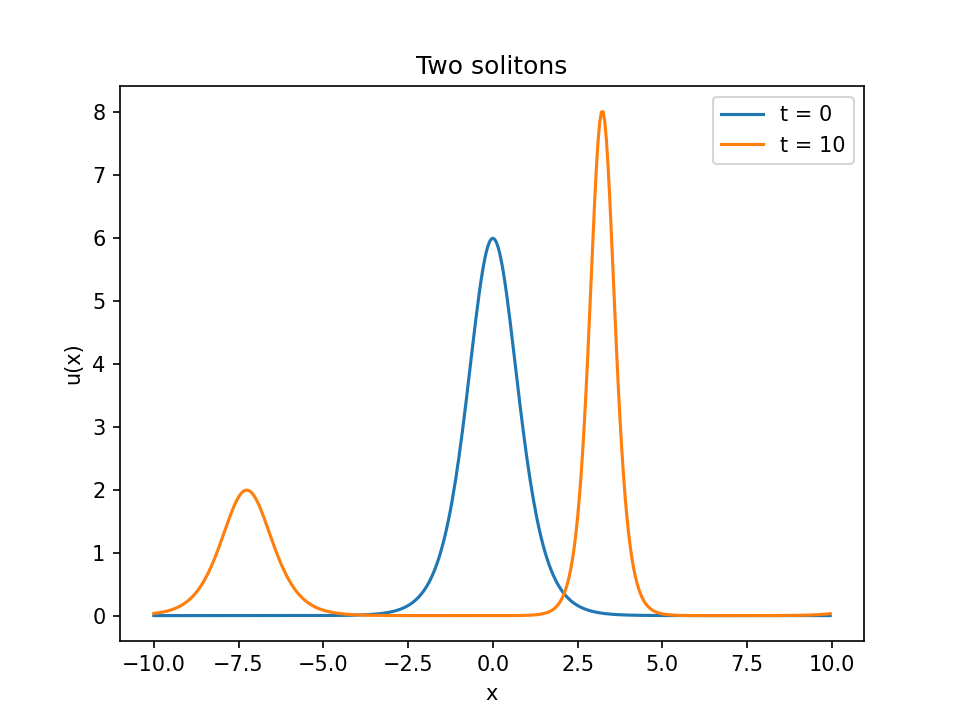

In [203]:
plt.figure()
plt.title('Two solitons')
plt.plot(x_grid, u_3(x_grid), label = 't = 0')
plt.plot(x_grid, u[-1], label = 't = 10')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

We observe two single solitons travelling across the domain with different speeds and amplitudes.

## d) Own two solitons

In [288]:
u = run(u_init = u_1(x_grid, 0, 14, 0) + u_1(x_grid, 0, 8, 0))

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:51<00:00, 1938.37it/s]


<IPython.core.display.Javascript object>


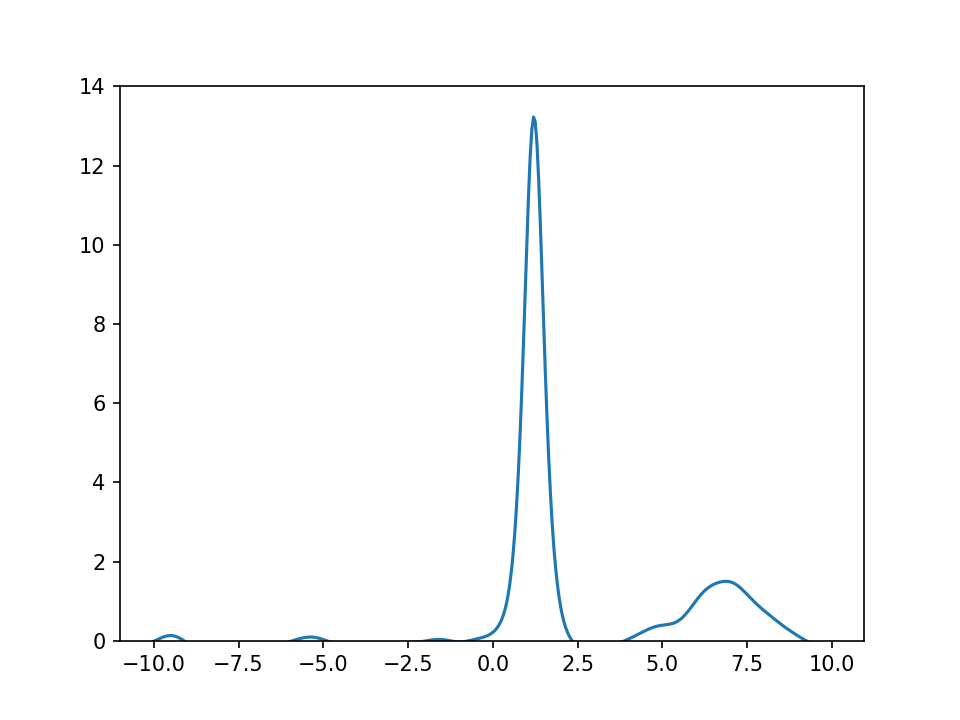

In [291]:
u_init = u_1(x_grid, 0, 14, 0) + u_1(x_grid, 0, 8, 0)
fig, ax = plt.subplots()

ax.set_ylim(0, 14)

line, = ax.plot(x_grid, u_init)


def animate(i):
    line.set_ydata(u[10*i])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=0, blit=True, save_count=50)
plt.show()

<IPython.core.display.Javascript object>


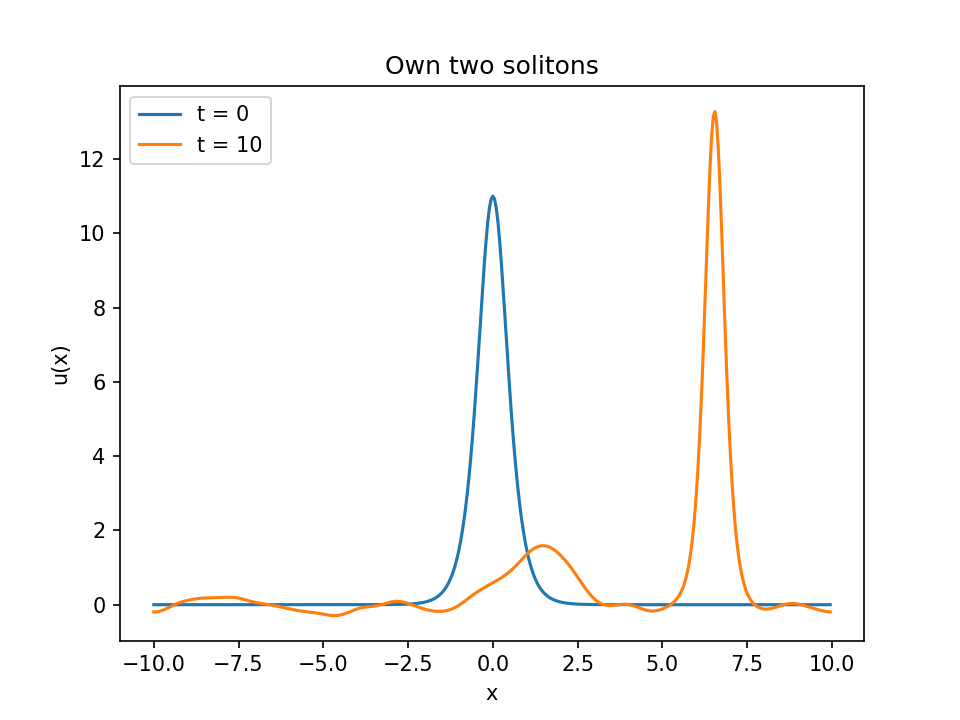

In [290]:
plt.figure()
plt.title('Own two solitons')
plt.plot(x_grid, u_1(x_grid, 0, 14, 0) + u_1(x_grid, 0, 8, 0), label = 't = 0')
plt.plot(x_grid, u[-1], label = 't = 10')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

One of the solitons with higher speed and amplitude traverses the domain almost unchanged, while the second soliton is affected by the ripples since they are of a comparable amplitude. 

## e) New own two solitons

In [292]:
u = run(u_init = u_1(x_grid, 0, 14, -3) + u_1(x_grid, 0, 8, 3))

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:43<00:00, 2278.34it/s]


<IPython.core.display.Javascript object>


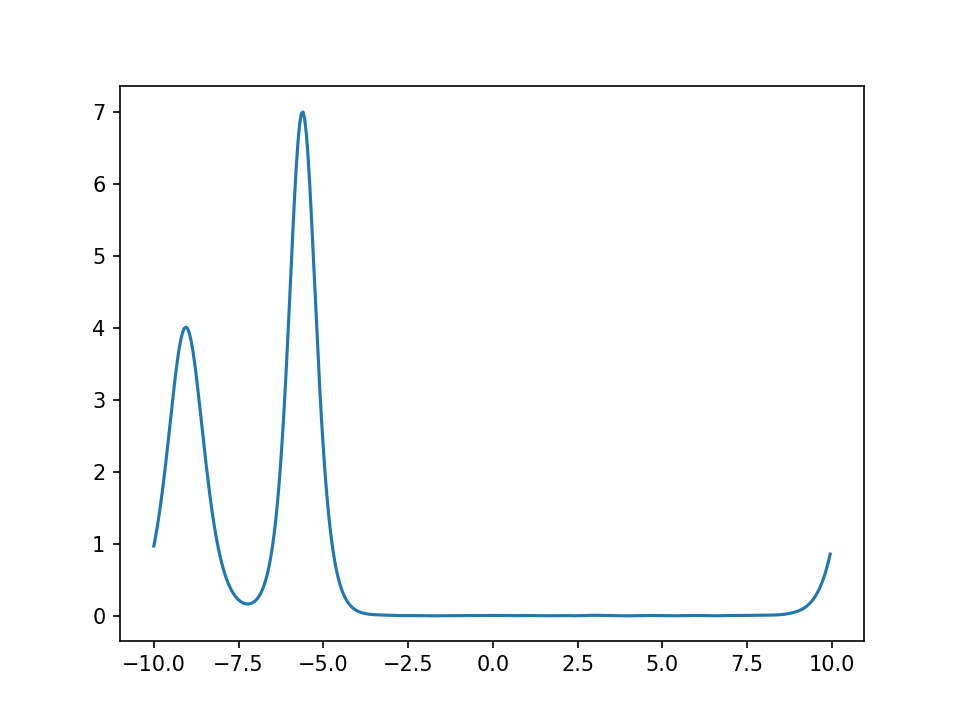

In [295]:
u_init = u_1(x_grid, 0, 14, -3) + u_1(x_grid, 0, 8, 3)
fig, ax = plt.subplots()

line, = ax.plot(x_grid, u_init)


def animate(i):
    line.set_ydata(u[100*i])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=50)
plt.show()

<IPython.core.display.Javascript object>


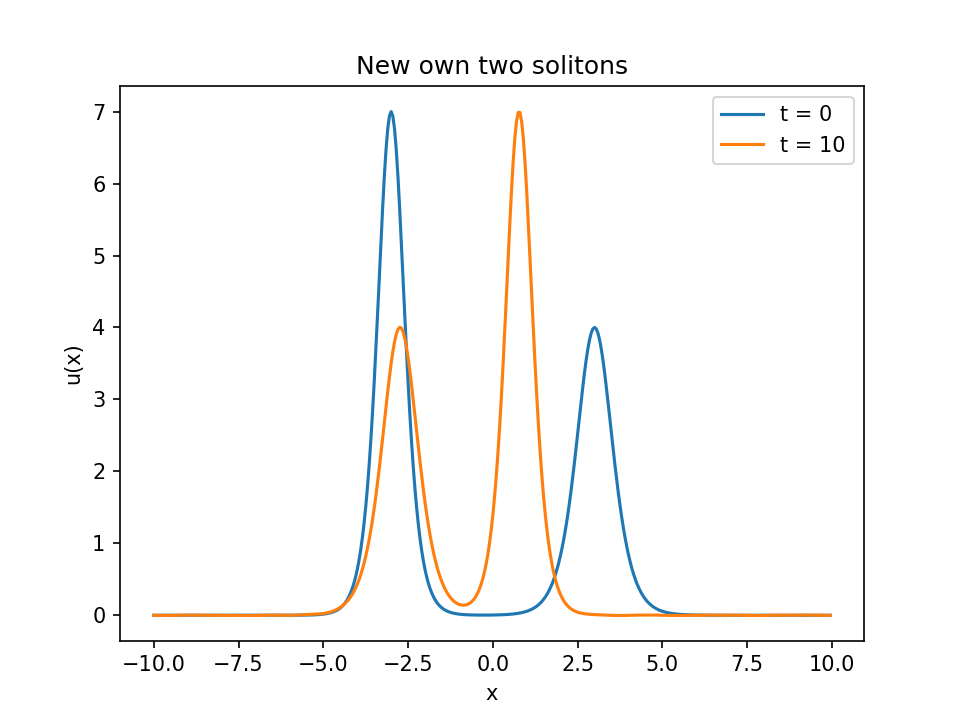

In [206]:
plt.figure()
plt.title('New own two solitons')
plt.plot(x_grid, u_1(x_grid, 0, 14, -3) + u_1(x_grid, 0, 8, 3), label = 't = 0')
plt.plot(x_grid, u[-1], label = 't = 10')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

Both solitons travel at specified speed and amplitude. When the crossing the resulting amplitude is smaller than the sum of both amplitudes. After the crossing the speed and amplitude of each soliton remain the same.

## Problem 2.

In [10]:
def f(ro):
    return ro*u_max*(1-ro/ro_max)

In [11]:
# ro = np.arange(0, 1.1, 0.1)
# fig, ax = plt.subplots()
# ax.plot(ro, f(ro))
# plt.show()

In [12]:
def roe_flux_pos(ro):
    a = u_max*(1 - (ro[1:-1]+ro[2:])/ro_max)
    flux = 0.5 * (f(ro[1:-1]) + f(ro[2:])) - 0.5*np.abs(a)*(ro[2:]-ro[1:-1])
    return flux

In [13]:
def roe_flux_neg(ro):
    a = u_max*(1 - (ro[1:-1]+ro[:-2])/ro_max)
    flux = 0.5 * (f(ro[:-2]) + f(ro[1:-1])) - 0.5*np.abs(a)*(ro[1:-1]-ro[:-2])
    return flux

In [14]:
def godunov_flux_pos(ro):
    max_f = np.where(ro[1:-1] <= ro_max/2, f(ro[1:-1]), np.where(ro[2:] >= ro_max/2, f(ro[2:]), f(ro_max/2)))
    flux = np.where(ro[1:-1] < ro[2:], np.minimum(f(ro[1:-1]), f(ro[2:])), max_f)
    #print(flux)
    return(flux)

In [15]:
def godunov_flux_neg(ro):
    max_f = np.where(ro[:-2] <= ro_max/2, f(ro[:-2]), np.where(ro[1:-1] >= ro_max/2, f(ro[1:-1]), f(ro_max/2)))
    flux = np.where(ro[:-2] < ro[1:-1], np.minimum(f(ro[1:-1]), f(ro[:-2])), max_f)
    return(flux)

In [16]:
def fin_vol(ro, flux_pos, flux_neg):
    new_ro = (ro[1:-1] - delta_t/delta_x*(flux_pos(ro)-flux_neg(ro)))
    #print(flux_pos(ro), flux_neg(ro))
    new_ro = np.hstack((ro_max, new_ro, new_ro[-1]))
    return new_ro

In [17]:
def run_fv(ro, flux_pos, flux_neg, ro_list):
    for t in np.arange(0, 2, delta_t):
        ro = fin_vol(ro, flux_pos, flux_neg)
        #print(ro)
        ro_list.append(ro)
    return 0

## Question 1)

In [5]:
ro_max = 1
u_max = 1
ro_l = ro_max
delta_x = 0.01
delta_t = 0.8*delta_x/u_max

In [6]:
x = np.arange(-5, 5, delta_x)
ro = np.zeros(len(x))
ro[np.nonzero(x < 0)] = ro_l

In [18]:
new_ro_roe, new_ro_godunov = [], []
run_fv(ro, roe_flux_pos, roe_flux_neg, new_ro_roe)
run_fv(ro, godunov_flux_pos, godunov_flux_neg, new_ro_godunov)

0

<IPython.core.display.Javascript object>


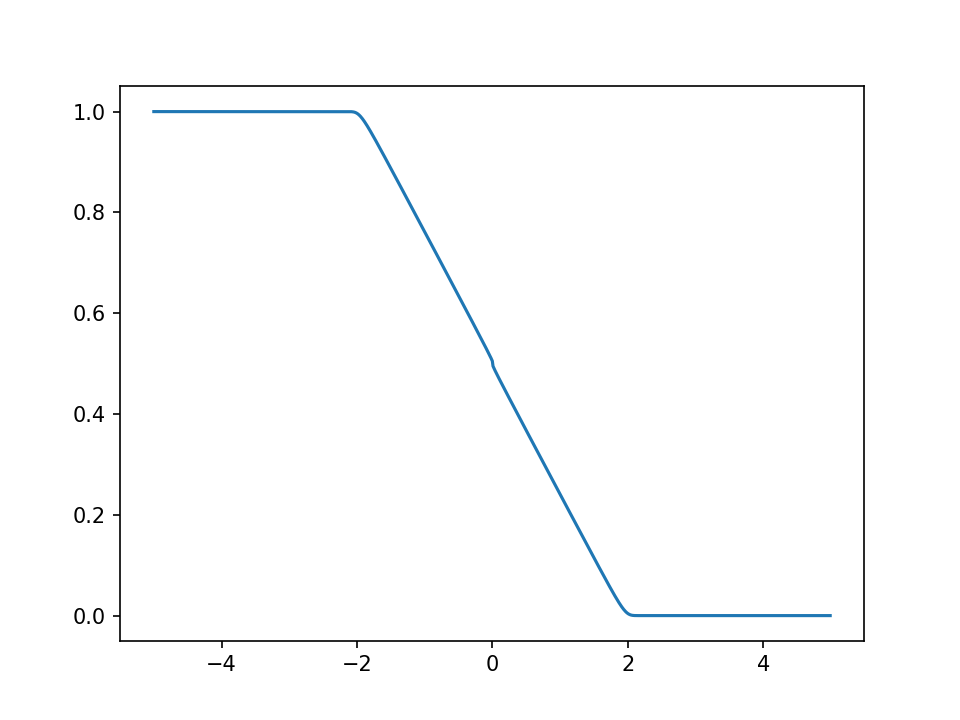

In [19]:
ro_init = ro
fig, ax = plt.subplots()

line, = ax.plot(x, ro_init)


def animate(i):
    line.set_ydata(new_ro_godunov[10*i])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=50)
plt.show()

<IPython.core.display.Javascript object>


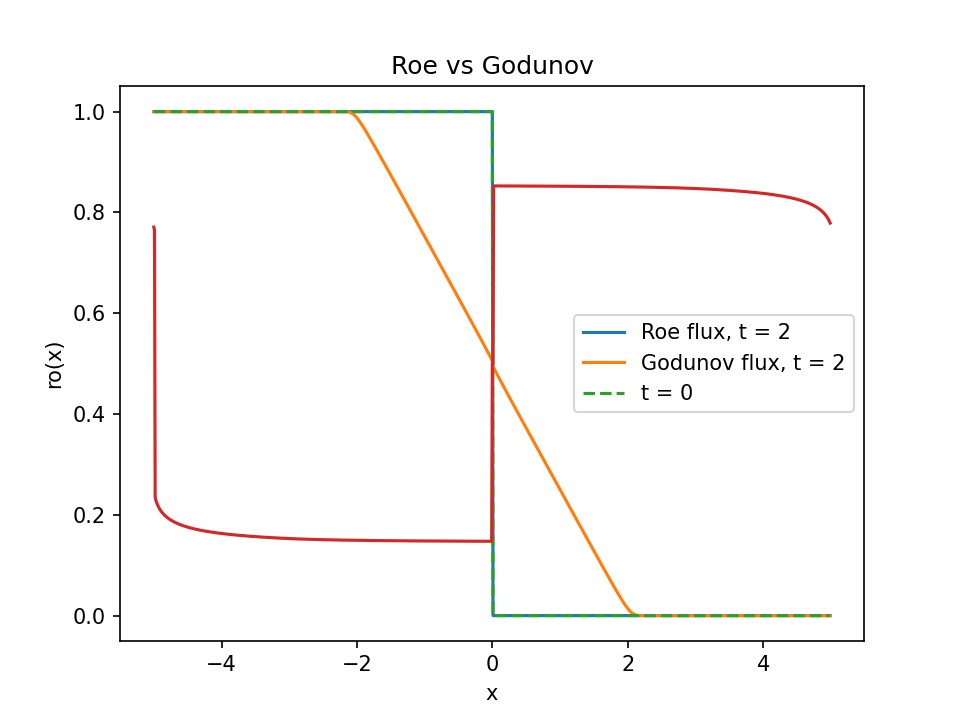

In [20]:
plt.figure()
plt.title('Roe vs Godunov')
plt.plot(x, new_ro_roe[-1], label = 'Roe flux, t = 2')
plt.plot(x, new_ro_godunov[-1], label = 'Godunov flux, t = 2')
plt.plot(x, ro_init, '--', label = 't = 0')
plt.xlabel('x')
plt.ylabel('ro(x)')
plt.legend()

As we can see from the plot, for the Roe flux there is no change in $\rho (x)$ after t = 2. The Godunov flux, however, shows the right behaviour: after the traffic light turned green the cars started to move to the right. The reason for that is the fact that Roe flux does not allow to capture stepwise differences in $\rho$.

## Question 3)

In [21]:
def fin_vol_tl_green(ro, flux_pos, flux_neg):
    new_ro = (ro[1:-1] - delta_t/delta_x*(flux_pos(ro)-flux_neg(ro)))
    #print(flux_pos(ro), flux_neg(ro))
    new_ro = np.hstack((ro_max/2, new_ro, new_ro[-1]))
    return new_ro

In [22]:
def fin_vol_tl_red(ro, flux_pos, flux_neg):
    flux_pos_red = flux_pos(ro)
    flux_pos_red[len(x)//2] = 0
    flux_neg_red = flux_neg(ro)
    flux_neg_red[len(ro)//2+1] = 0
    new_ro = (ro[1:-1] - delta_t/delta_x*(flux_pos_red-flux_neg_red))
    #print(flux_pos(ro), flux_neg(ro))
    new_ro = np.hstack((ro_max/2, new_ro, new_ro[-1]))
    return new_ro

In [23]:
def run_fv_tl(ro, flux_pos, flux_neg, ro_list):
    ro_tl = np.zeros((int(T/delta_t), len(ro)))
    for t in range(0, int(T_1/delta_t)):
        ro = fin_vol_tl_red(ro, flux_pos, flux_neg)
        ro_tl[t] = ro
        ro_list.append(ro)
    for t in range(int(T_1/delta_t), int(T/delta_t)):
        ro = fin_vol_tl_green(ro, flux_pos, flux_neg)
        ro_tl[t] = ro
        #print(ro)
        ro_list.append(ro)
    return ro_tl, ro

In [67]:
def average_flow(ro_T, posit=-delta_x):
    N_t = int(T/delta_t)
    return 1/N_t * (f(ro_T[:, int(posit/delta_x)]).sum(0))

In [29]:
ro_max = 1
u_max = 1
delta_x = 0.01
delta_t = 0.8*delta_x/u_max
x_tl = -delta_x/2
T_1, T_2 = 1, 1
T = T_1 + T_2

In [30]:
x = np.arange(-5, 5, delta_x)
ro = np.zeros(len(x))
ro[0] = ro_max/2

In [68]:
ro_godunov_tl = []
#while abs((-q_old + q_new)) >= 1e-4:
q_total = []
#for posit in np.arange(-5, 5, delta_x):
q_new = 0
q_old = 1
print(posit)
while abs(-q_old + q_new) > 0:
    print((-q_old + q_new))
    ro_tl, ro = run_fv_tl(ro, godunov_flux_pos, godunov_flux_neg, ro_godunov_tl)
    #print(ro_tl)
    q_old = q_new
    q_new = average_flow(ro_tl)
    #print(q_old.shape, q_new.shape)

4.989999999999787
-1
0.12500000000000003


<IPython.core.display.Javascript object>


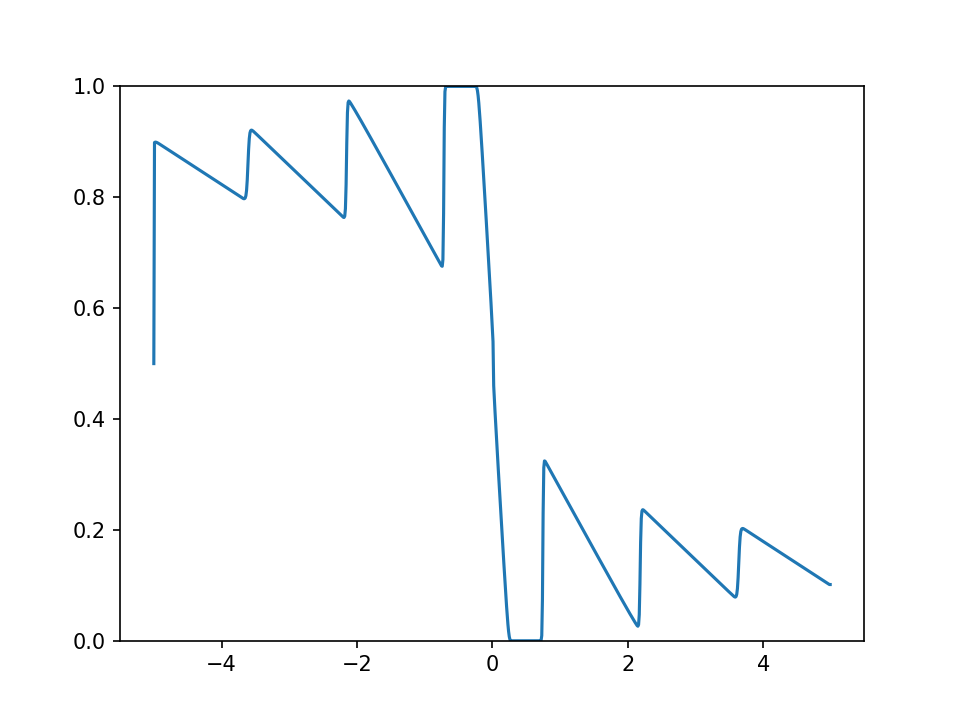

In [69]:
ro = np.zeros(len(x))
ro[0] = ro_max/2
ro_init = ro
fig, ax = plt.subplots()

line, = ax.plot(x, ro_init)
ax.set_ylim(0, 1)


def animate(i):
    line.set_ydata(ro_godunov_tl[10*i])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=200, blit=True, save_count=50)
plt.show()

In [70]:
q_new

0.12500000000000003

<IPython.core.display.Javascript object>


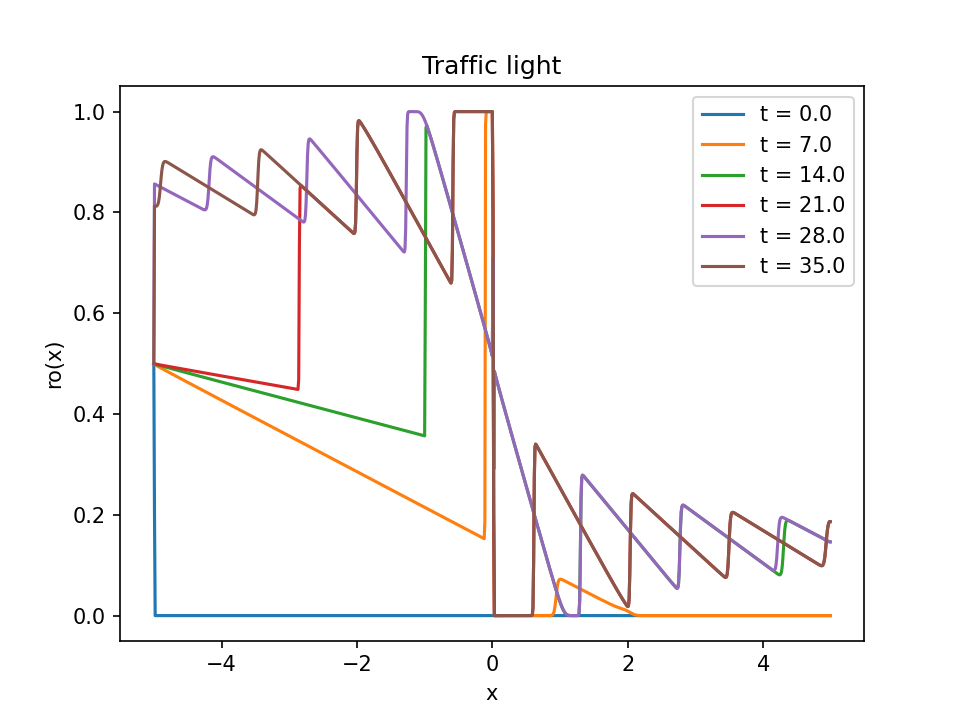

In [339]:
plt.figure()
plt.title('Traffic light')
for i in range(0, int(20*T/delta_t), int(3.5*T/delta_t)):
    plt.plot(x, ro_godunov_tl[i], label = 't = {}'.format(delta_t*i))
#plt.plot(x, ro_init, '--', label = 't = 0')
plt.xlabel('x')
plt.ylabel('ro(x)')
plt.legend()

## Question 4)

In [71]:
def fin_vol_2_tl_green_green(ro, flux_pos, flux_neg):
    new_ro = (ro[1:-1] - delta_t/delta_x*(flux_pos(ro)-flux_neg(ro)))
    #print(flux_pos(ro), flux_neg(ro))
    new_ro = np.hstack((ro_max/2, new_ro, new_ro[-1]))
    return new_ro

In [72]:
def fin_vol_2_tl_green_red(ro, flux_pos, flux_neg):
    flux_pos_red = flux_pos(ro)
    flux_pos_red[len(ro)//2+int(0.1/delta_x)] = 0
    flux_neg_red = flux_neg(ro)
    flux_neg_red[len(ro)//2+1+int(0.1/delta_x)] = 0
    new_ro = (ro[1:-1] - delta_t/delta_x*(flux_pos_red-flux_neg_red))
    #print(flux_pos(ro), flux_neg(ro))
    new_ro = np.hstack((ro_max/2, new_ro, new_ro[-1]))
    return new_ro

In [73]:
def fin_vol_2_tl_red_green(ro, flux_pos, flux_neg):
    flux_pos_red = flux_pos(ro)
    flux_pos_red[len(ro)//2] = 0
    flux_neg_red = flux_neg(ro)
    flux_neg_red[len(ro)//2+1] = 0
    new_ro = (ro[1:-1] - delta_t/delta_x*(flux_pos_red-flux_neg_red))
    #print(flux_pos(ro), flux_neg(ro))
    new_ro = np.hstack((ro_max/2, new_ro, new_ro[-1]))
    return new_ro

In [74]:
def fin_vol_2_tl_red_red(ro, flux_pos, flux_neg):
    flux_pos_red = flux_pos(ro)
    flux_pos_red[len(ro)//2+int(0.1/delta_x)] = 0
    flux_pos_red[len(ro)//2] = 0
    flux_neg_red = flux_neg(ro)
    flux_neg_red[len(ro)//2+1+int(0.1/delta_x)] = 0
    new_ro = (ro[1:-1] - delta_t/delta_x*(flux_pos_red-flux_neg_red))
    #print(flux_pos(ro), flux_neg(ro))
    new_ro = np.hstack((ro_max/2, new_ro, new_ro[-1]))
    return new_ro

In [75]:
def run_fv_2_tl(ro, flux_pos, flux_neg, ro_list, delay):
    ro_tl = np.zeros((int(T/delta_t), len(ro)))
    if delay < T_1:
        for t in range(0, int(delay/delta_t)):
            ro = fin_vol_2_tl_green_red(ro, flux_pos, flux_neg)
            ro_tl[t] = ro
            #print(ro)
            ro_list.append(ro)
        for t in range(int(delay/delta_t), int(T_1/delta_t)):
            ro = fin_vol_2_tl_green_green(ro, flux_pos, flux_neg)
            ro_tl[t] = ro
            #print(ro)
            ro_list.append(ro)
        for t in range(int(T_1/delta_t), int((T_1+delay)/delta_t)):
            ro = fin_vol_2_tl_red_green(ro, flux_pos, flux_neg)
            ro_tl[t] = ro
            #print(ro)
            ro_list.append(ro)
        for t in range(int((T_1+delay)/delta_t), int(T/delta_t)):
            ro = fin_vol_2_tl_red_red(ro, flux_pos, flux_neg)
            ro_tl[t] = ro
            ro_list.append(ro)
        return ro_tl, ro
    else:
        for t in range(0, int((-T_1+delay)/delta_t)):
            ro = fin_vol_2_tl_green_green(ro, flux_pos, flux_neg)
            ro_tl[t] = ro
            #print(ro)
            ro_list.append(ro)
        for t in range(int((-T_1+delay)/delta_t), int(T_1/delta_t)):
            ro = fin_vol_2_tl_green_red(ro, flux_pos, flux_neg)
            ro_tl[t] = ro
            #print(ro)
            ro_list.append(ro)
        for t in range(int(T_1/delta_t), int(delay/delta_t)):
            ro = fin_vol_2_tl_red_red(ro, flux_pos, flux_neg)
            ro_tl[t] = ro
            #print(ro)
            ro_list.append(ro)
        for t in range(int(delay/delta_t), int((T)/delta_t)):
            ro = fin_vol_2_tl_red_green(ro, flux_pos, flux_neg)
            ro_tl[t] = ro
            ro_list.append(ro)
        return ro_tl, ro

In [76]:
x = np.arange(-5, 5, delta_x)

In [79]:
delays = [k*T/20 for k in range(20)]
q_s = []
ro_godunov_2_tl = []
#while abs((-q_old + q_new)) >= 1e-4:
for delay in delays:
    ro = np.zeros(len(x))
    ro[0] = ro_max/2
    q_new = 0
    q_old = 1
    #print(delay)
    for n in range(20):
        print((-q_old + q_new))
        ro_tl, ro = run_fv_2_tl(ro, godunov_flux_pos, godunov_flux_neg, ro_godunov_2_tl, delay)
        #print(ro_tl)
        q_old = q_new
        q_new = average_flow(ro_tl)
    q_s.append(q_new)
    #print(len(ro_godunov_2_tl))
        #print(q_old.shape, q_new.shape)

-1
0.0
0.0
0.0
1.8429447931760771e-96
6.87469599756443e-05
0.02882691167629747
0.08681846364428203
0.009248682856278376
3.719486316651477e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1
0.0
0.0
0.0
1.4069037164136253e-96
0.00023418523220718453
0.024668426433197495
0.09647706099951524
0.002290991533318465
0.0013293358017616441
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1
0.0
0.0
0.0
0.0
0.0002492879447453855
0.02057590425885934
0.09900833997414546
0.002838724135940246
0.002323838964560218
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1
0.0
0.0
0.0
0.0
0.0002492879639348108
0.017084000706155164
0.09776556309861371
0.00023823213731741233
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1
0.0
0.0
0.0
0.0
0.0002492879639348116
0.013623427091304681
0.08884254727679779
2.0577038822855442e-09
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1
0.0
0.0
0.0
0.0
0.00024928796393481153
0.010741411525709052
0.08020247919412457
2.6631474803195943e-14
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1
0.0
0.0
0.0
0.0
0.0

<IPython.core.display.Javascript object>


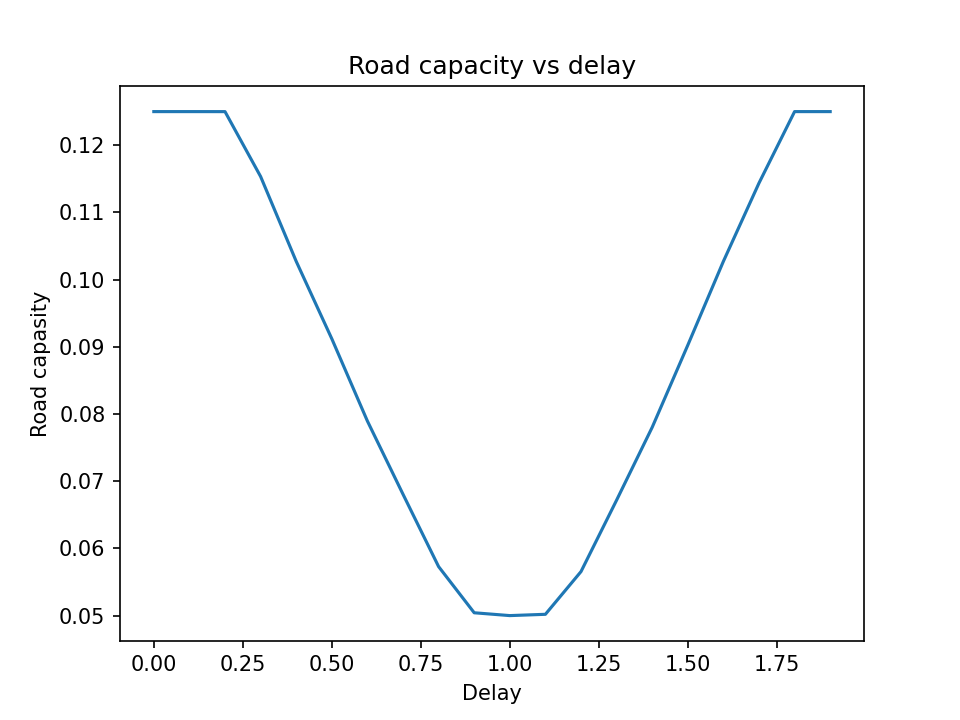

Text(0, 0.5, 'Road capasity')

In [80]:
plt.figure()
plt.plot(delays, q_s)
plt.title('Road capacity vs delay')
plt.xlabel('Delay')
plt.ylabel('Road capasity')

In [348]:
print('The optimal delay is {}.'.format(np.array(delays)[np.where(q_s == np.max(q_s))[0]][0]))

The optimal delay is 0.6.


<IPython.core.display.Javascript object>


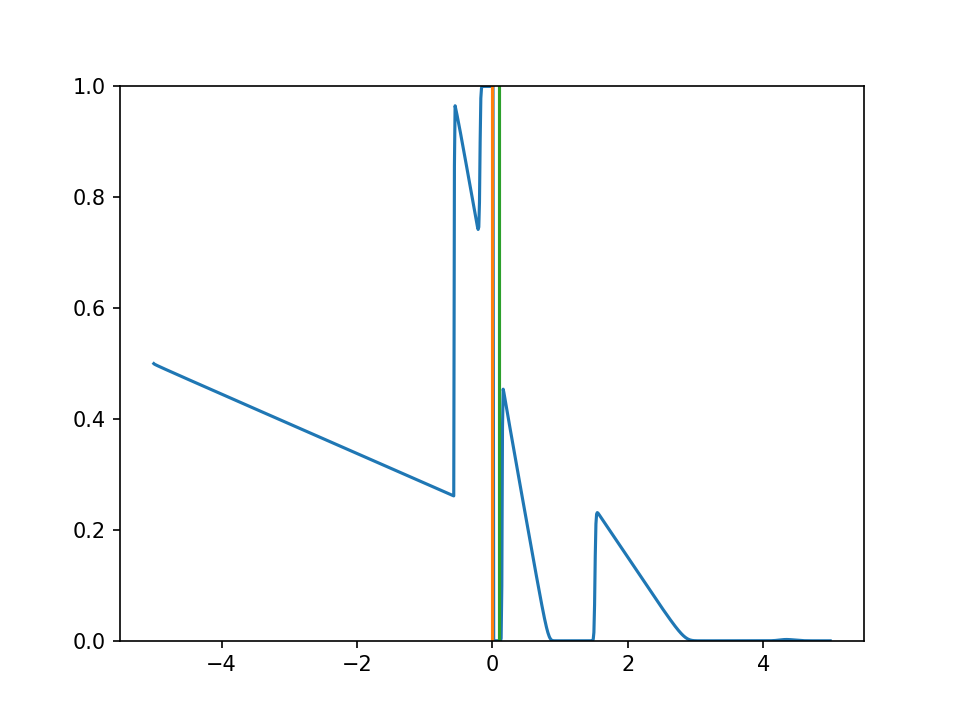

In [349]:
ro = np.zeros(len(x))
ro[0] = ro_max/2
ro_init = ro
fig, ax = plt.subplots()

ax.set_ylim = (0, 2)

line, = ax.plot(x, ro_init)
ax.plot([-delta_x/2]*2, [0, 1])
ax.plot([-delta_x/2 + 0.1]*2, [0, 1])

k = 12

def animate(i):
    line.set_ydata(ro_godunov_2_tl[k*int(T/delta_t)*10:(k+1)*int(T/delta_t)*10][10*i])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=50)
plt.show()